This analysis aims to identify the best solution to minimize delivery time, which is a crucial factor in enhancing overall client satisfaction. By focusing on optimizing delivery efficiency, businesses can ensure faster service, leading to happier customers and stronger retention. The dataset used for this study includes several attributes such as delivery personnel information, geographical data, and performance metrics. However, this specific analysis emphasizes only two key variables: vehicle type and distance. These factors were selected due to their direct influence on delivery duration and logistics planning. Understanding how these variables impact delivery times will help in implementing more effective strategies to improve operational efficiency...

In [1]:
import pandas as pd 
df=pd.read_excel("C:/Users/chahd/Downloads/Food_Time_Data_Set.xlsx")


In [2]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET (Delivery time in minutes)
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.266667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.583333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.183333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.450000


In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Unnamed: 14,Distance (km),TARGET (Delivery time in minutes)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9995.000000,9995.000000,9995.000000,0.0,9080.000000,9040.000000
mean,29.522000,4.629370,16.893418,70.177749,17.412655,70.880072,22.936907,66.164882,0.016233,NaN,14.292747,37.656750
std,5.700348,0.322941,8.330948,23.203352,7.336846,21.174585,3.379448,15.602939,0.074911,NaN,8.376254,16.555938
min,15.000000,1.000000,-30.902872,-88.352885,0.010000,0.010000,6.770000,27.000000,0.000000,NaN,1.550000,5.800000
25%,25.000000,4.500000,12.913041,73.170937,12.983959,73.753278,20.140000,54.000000,0.000000,NaN,7.620000,25.566667
50%,29.000000,4.700000,18.546258,75.902847,18.626216,76.022574,23.000000,67.000000,0.000000,NaN,13.400000,35.983333
75%,34.000000,4.800000,22.727021,78.047717,22.785089,78.128092,25.980000,81.000000,0.000000,NaN,19.610000,47.633333
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,29.050000,94.000000,1.460000,NaN,59.840000,157.750000


This calculates the percentage of missing values (NaN) in each column of df1. It's useful for deciding which columns to keep or drop.

In [7]:
nan_percentage = df.isna().mean() * 100
print(nan_percentage)

ID                                     0.009999
Delivery_person_ID                     0.009999
Delivery_person_Age                    0.009999
Delivery_person_Ratings                0.009999
Restaurant_latitude                    0.009999
Restaurant_longitude                   0.009999
Delivery_location_latitude             0.009999
Delivery_location_longitude            0.009999
Type_of_order                          0.009999
Type_of_vehicle                        0.009999
temperature                            0.059994
humidity                               0.059994
precipitation                          0.059994
weather_description                    0.059994
Unnamed: 14                          100.000000
Traffic_Level                          9.159084
Distance (km)                          9.209079
TARGET (Delivery time in minutes)      9.609039
dtype: float64


In [9]:
df.drop('Unnamed: 14', axis=1, inplace=True)

this cell Prints unique values for each column to explore data variety.

In [11]:
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'ID':
[4607 'B379' '5D6D' ... '338B' '3FB2' nan]


Unique values in column 'Delivery_person_ID':
['INDORES13DEL02' 'BANGRES18DEL02' 'BANGRES19DEL01' ... 'BHPRES09DEL02'
 'ALHRES13DEL01' nan]


Unique values in column 'Delivery_person_Age':
[37. 34. 23. 38. 32. 22. 33. 35. 36. 21. 24. 29. 25. 31. 27. 26. 20. 28.
 39. 30. 15. 50. nan]


Unique values in column 'Delivery_person_Ratings':
[4.9 4.5 4.4 4.7 4.6 4.8 4.2 4.3 4.  4.1 5.  3.5 3.8 3.9 3.7 2.6 2.5 3.6
 3.1 2.7 1.  3.2 3.3 6.  3.4 2.8 2.9 3.  nan]


Unique values in column 'Restaurant_latitude':
[ 22.745049  12.913041  12.914264  11.003669  12.972793  17.431668
  23.369746  12.352058  17.433809  30.327968  10.003064  18.56245
  30.899584  26.463504  19.176269  12.311072  18.592718  17.426228
  22.552672  18.563934  23.357804  12.986047  19.221315  13.005801
  26.849596  21.160522  12.934179  18.51421   11.022477  21.160437
  15.51315   15.561295   0.        18.55144   18.593481  21.173343
  17.451976  12.972


To ensure the dataset is clean and ready for analysis, missing values were handled using appropriate imputation techniques:

- **Categorical columns** (`Traffic_Level`, `Type_of_order`, `weather_description`, `Type_of_vehicle`) were filled with their respective mode (most frequent value).
- **Numerical columns** (`Delivery_person_Age`, `Delivery_person_Ratings`, `temperature`, `humidity`, `precipitation`, `Distance (km)`) were filled with their respective mean.

This approach helps maintain the overall distribution of the data while avoiding the introduction of significant bias.
Proper handling of missing values is crucial for building reliable and accurate analytical models.

In [13]:
df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)
df['Type_of_order'].fillna(df['Type_of_order'].mode()[0], inplace=True)
df['weather_description'].fillna(df['weather_description'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)

df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean(), inplace=True)
df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean(), inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean(), inplace=True)
df['temperature'].fillna(df['temperature'].mean(), inplace=True)
df['humidity'].fillna(df['humidity'].mean(), inplace=True)
df['precipitation'].fillna(df['precipitation'].mean(), inplace=True)
df['Distance (km)'].fillna(df['Distance (km)'].mean(), inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_22260\1522838297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0], inplace=True)
C:\Users\chahd\AppData\Local\Temp\ipykernel_22260\1522838297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [15]:
df['TARGET (Delivery time in minutes)'].fillna(37.656750, inplace=True)

C:\Users\chahd\AppData\Local\Temp\ipykernel_22260\3374692267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TARGET (Delivery time in minutes)'].fillna(37.656750, inplace=True)


In [17]:
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'ID':
[4607 'B379' '5D6D' ... '338B' '3FB2' nan]


Unique values in column 'Delivery_person_ID':
['INDORES13DEL02' 'BANGRES18DEL02' 'BANGRES19DEL01' ... 'BHPRES09DEL02'
 'ALHRES13DEL01' nan]


Unique values in column 'Delivery_person_Age':
[37.    34.    23.    38.    32.    22.    33.    35.    36.    21.
 24.    29.    25.    31.    27.    26.    20.    28.    39.    30.
 15.    50.    29.522]


Unique values in column 'Delivery_person_Ratings':
[4.9     4.5     4.4     4.7     4.6     4.8     4.2     4.3     4.
 4.1     5.      3.5     3.8     3.9     3.7     2.6     2.5     3.6
 3.1     2.7     1.      3.2     3.3     6.      3.4     2.8     2.9
 3.      4.62937]


Unique values in column 'Restaurant_latitude':
[ 22.745049  12.913041  12.914264  11.003669  12.972793  17.431668
  23.369746  12.352058  17.433809  30.327968  10.003064  18.56245
  30.899584  26.463504  19.176269  12.311072  18.592718  17.426228
  22.552672  18.563934  23.357804  12.986047  19.22

"""

""" converting categorical features into numeric

"""

In [19]:
traffic_map = {
    'Very Low': 0,
    'Low': 1,
    'Moderate': 2,
    'High': 3,
    'Very High': 4
}
df['Traffic_Level'] = df['Traffic_Level'].map(traffic_map)

In [21]:
order_map = {
    'Drinks': 0,
    'Snack': 1,
    'Buffet': 2,
    'Meal': 3
}
df['Type_of_order'] = df['Type_of_order'].map(order_map)

In [23]:
weather_map = {
    'clear sky': 0,
    'few clouds': 1,
    'scattered clouds': 2,
    'broken clouds': 3,
    'overcast clouds': 4,
    'mist': 5,
    'fog': 6,
    'haze': 7,
    'smoke': 8,
    'light rain': 9,
    'moderate rain': 10
}
df['weather_description'] = df['weather_description'].map(weather_map)

In [27]:
vehicle_map = {
    'bicycle': 0,
    'electric_scooter': 1,
    'scooter': 2,
    'motorcycle': 3
}
df['Type_of_vehicle'] = df['Type_of_vehicle'].map(vehicle_map)

### Correlation Analysis of Target Delivery Time with Other Features

In this section, we analyze the correlation between the target delivery time and various other features in the dataset.
By computing correlation coefficients, we can identify which factors are most strongly associated with the delivery time.
This can help in understanding the key drivers of delivery time and improve decision-making for optimization.


In [29]:
df_filtered = df.drop(columns=['Delivery_person_ID', 'ID'])
correlation_matrix = df_filtered.corr()
print(correlation_matrix['TARGET (Delivery time in minutes)'].sort_values(ascending=False))  

TARGET (Delivery time in minutes)    1.000000
Traffic_Level                        0.872422
Distance (km)                        0.866208
temperature                          0.045919
Type_of_vehicle                      0.006217
Delivery_person_Age                  0.005574
Delivery_location_longitude          0.003267
precipitation                        0.002200
Restaurant_longitude                 0.001777
humidity                            -0.014005
Delivery_location_latitude          -0.017429
Restaurant_latitude                 -0.018703
weather_description                 -0.090749
Delivery_person_Ratings             -0.095335
Type_of_order                       -0.194923
Name: TARGET (Delivery time in minutes), dtype: float64


### Categorizing Delivery Time

In this section, we categorize the delivery time into three groups: *Fast*, *Moderate*, and *Slow*. The categories are based on the target delivery time in minutes, with the following thresholds:

- **Fast**: Delivery time less than 20 minutes
- **Moderate**: Delivery time between 20 and 40 minutes
- **Slow**: Delivery time greater than 40 minutes

The code below applies these categories to the `TARGET (Delivery time in minutes)` column in the dataset, creating a new column called `delivery_time_category`.

In [35]:
def categorize_delivery_time(x):
    if x < 20:
        return 0  #fast
    elif x <= 40:
        return 1  # Moderate
    else:
        return 2  # Slow

df['delivery_time_category'] = df['TARGET (Delivery time in minutes)'].apply(categorize_delivery_time)

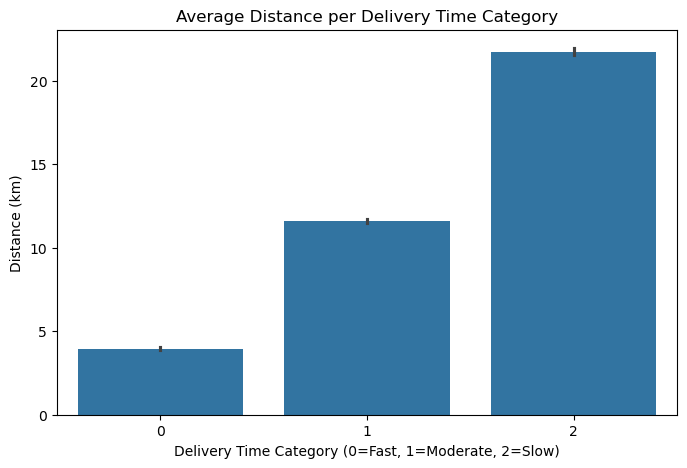

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='delivery_time_category', y='Distance (km)', estimator='mean')
plt.title('Average Distance per Delivery Time Category')
plt.ylabel('Distance (km)')
plt.xlabel('Delivery Time Category (0=Fast, 1=Moderate, 2=Slow)')
plt.show()


### 📊 Average Distance by Delivery Time Category

The bar chart illustrates the relationship between **delivery time categories** and the corresponding **average delivery distance** (in kilometers):

- **Category 0 (Fast):** ~4 km
- **Category 1 (Moderate):** ~12 km
- **Category 2 (Slow):** ~22 km

#### 🔍 Insight:
There is a **clear positive correlation** between delivery distance and delivery time. As the average distance increases, delivery times tend to be slower. This suggests that longer delivery distances significantly impact delivery speed and may require logistical optimization for efficiency.

#### 🛠️ Axis Descriptions:
- **X-axis:** Delivery Time Categories  
  - 0 = Fast  
  - 1 = Moderate  
  - 2 = Slow  
- **Y-axis:** Average Distance (km)

This visualization can help businesses identify thresholds where delivery time starts to degrade and optimize routes or fulfillment centers accordingly.

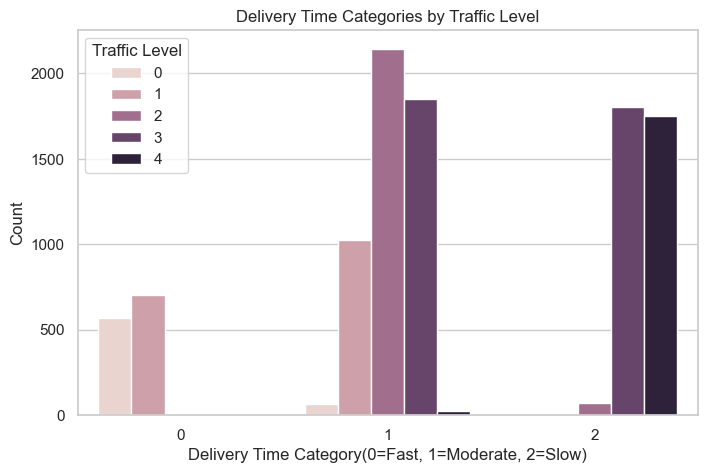

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='delivery_time_category', hue='Traffic_Level')#traffic_level (0=very low,1=low,2=moderate,3=high,4=very high)
plt.title('Delivery Time Categories by Traffic Level')
plt.xlabel('Delivery Time Category(0=Fast, 1=Moderate, 2=Slow)')
plt.ylabel('Count')
plt.legend(title='Traffic Level')
plt.show()

### 🚦 Delivery Time Categories by Traffic Level

This count plot displays the distribution of deliveries across different **traffic levels** for each **delivery time category**:

- **X-axis:** Delivery Time Category  
  - 0 = Fast  
  - 1 = Moderate  
  - 2 = Slow  

- **Y-axis:** Count of deliveries

- **Hue (Color):** Traffic Level  
  - 0 = Very Low  
  - 1 = Low  
  - 2 = Moderate  
  - 3 = High  
  - 4 = Very High

#### 🔍 Observations:
- **Fast Deliveries (Category 0)** mostly occurred when traffic levels were **low or very low**.
- **Moderate Deliveries (Category 1)** had the highest frequency under **moderate to high traffic**, especially level 2.
- **Slow Deliveries (Category 2)** were most common in **high to very high traffic conditions** (levels 3 and 4).

#### 📈 Insight:
There is a **clear trend** showing that **as traffic level increases, delivery time tends to be slower**. This supports the hypothesis that **traffic congestion significantly contributes to delivery delays**.



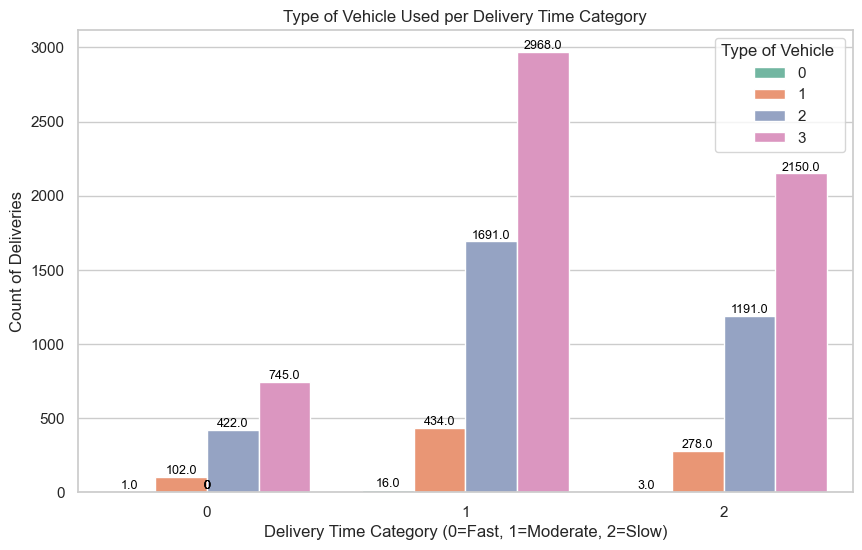

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")


ax = sns.countplot(x='delivery_time_category', hue='Type_of_vehicle', data=df, palette='Set2')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=9, color='black')

plt.title("Type of Vehicle Used per Delivery Time Category")
plt.xlabel("Delivery Time Category (0=Fast, 1=Moderate, 2=Slow)")
plt.ylabel("Count of Deliveries")
plt.legend(title="Type of Vehicle ")#Type of Vehicle (0=bicycle,1=electric_scooter,2=scooter,3=motorcycle)
plt.show()

Vehicle Type Distribution Across Delivery Time Categories

This bar chart illustrates how different types of vehicles are distributed across the three delivery time categories:  
- `0` = Fast  
- `1` = Moderate  
- `2` = Slow  

###  Vehicle Types:
- **0 = Bicycle**
- **1 = Electric Scooter**
- **2 = Scooter**
- **3 = Motorcycle**

###  Key Observations:
- **Motorcycles (Type 3)** dominate all categories, especially **moderate (2968)** and **slow (2150)** delivery times, while also leading in the **fast category (745)**.
- **Scooters (Type 2)** show strong representation across all categories, with:
  - **Fast deliveries:** 422  
  - **Moderate:** 1691  
  - **Slow:** 1191  
  This suggests balanced and versatile usage.
- **Electric Scooters (Type 1)** are mostly used for **moderate (434)** and **slow (278)** deliveries, with only **102** fast deliveries.
- **Bicycles (Type 0)** are virtually unused, with only a few deliveries, including just **1 fast** delivery.

###  Interpretation:
- Motorcycles are the preferred and most effective vehicle for all delivery types, particularly where **speed and volume** are critical.
- Scooters offer a balanced performance and are well-suited for a variety of delivery timelines.
- Electric scooters may not be optimal for time-sensitive deliveries.
- Bicycles are rarely used and do not contribute significantly to fast or efficient delivery outcomes.


 ##  Final Conclusion: Strategies to Minimize Delivery Time

The analysis combines **delivery time trends**, **traffic level impact**, and **vehicle performance** to develop a targeted delivery optimization strategy.

# 🛣 Key Insight from Visualizations

- **Average distance increases significantly** with slower delivery categories, indicating a strong relationship between **distance and delay**.
- **Traffic congestion** has a major influence on delivery delays:
  - Fast deliveries occur mostly under **low traffic conditions**.
  - Moderate and slow deliveries are most frequent under **moderate to very high traffic**.

This emphasizes the importance of **choosing the right vehicle types** and **optimizing delivery timing/routes** based on traffic patterns.
---

### 🛵 Target-Oriented Interpretation: Minimizing Delivry Time

#### ✅ Top Performer: Motorcycle (Type 3)
- **Fast Deliveries:** 745  
- **Strengths:** 
  - Highest volume of fast deliveries
  - Dominates overall usage
- **Interpretation:** Motorcycles are the fastest and most scalable delivery option. Best suited for time-sensitive or longer-dstance routes.

#### ⚖ Reliable Choice: Scooter (Type 2)
- **Fast Deliveries:** 422  
- **Moderate + Slow Deliveries:** High count
- **Interpretation:** Scooters offer a **balanced mix of speed and reliability**. Great for diverse route profiles, offering consistency where motorcycs aren't feasible.

#### ⚠️ Low Efficiency: Electric Scooter (Type 1)
- **Fast Deliveries:** Only 102
- **Mostly moderate/slow**
- **Interpretation:** While eco-friendly, electric scooters struggle with speed or distance. Not ideal for inimizing delivery time.

#### ❌ Not Suitable: Bicycle (Type 0)
- **Fast Deliveries:** 1 (negligible)
- **Very limited usage overall**
- **Interpretation:** Physical limitations make bicycles **unsuitable for timely deliveries**, especially complex or long routes.

---

### 🧭 Recommendation

To **minimize delivery time effectively**, te following strategy is recommended:

- **✅ Prioritize Motorcycles**: Deploy them as the primary vehicle — they led in speed and can handle high volumes.
- **⚖ Use Scooters as a Reliable Backup**: Ideal for stable, moderatelyrgent deliveries and flexible coverage.
- **🚫 Avoid Electric Scooters and Bicycles**: Their limited speed and efficiency reduce their suitability for fast delivery needs.

---

This data-driven insight supports smarter vehicle allocation, especially during **peak traffic hours** or for **long-distance delivery planning**.